# Inspect Module

* The inspect module helps to fetch the complete stack information of the requesting caller, such as module name, function name, etc.
* To perform an inspection on the caller of the method or a function **inspect** module is used.
* It is a Python in-built library.

**demo.py**

```
import inspect
def getInfo():
  print(inspect.stack()) 
  print("Caller Module Name: ", inspect.stack()[1][1])
  print("Caller Function Name: ", inspect.stack()[1][3])
```

**test.py** 

```
from demo import getInfo
def f1():  # f1 is the caller of getInfo() method
  getInfo()
  
f1()
```

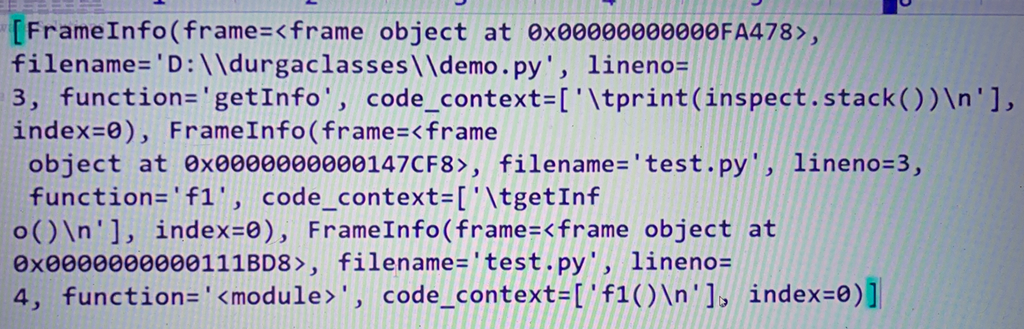

Caller Module Name: **test.py**

Caller Function Name: **f1**
  

# Generic Custom Logger

## Demo Program 1

**custlogger.py**

```
import logging
import inspect
def get_custom_logger(level):
  function_name =inspect.stack()[1][3]
  logger_name=function_name+" logger"
  
  logger=logging.getLogger(logger_name)
  logger.setLevel(level)

  fileHandler = logging.FileHandler('abc.log',mode='a')
  fileHandler.setLevel(level)
  
  formatter=logging.Formatter(
  '%(asctime)s:%(levelname)s:%(name)s:%(message)s',
  datefmt='%d/%m/%Y %I:%M:%S %p'
  )
  
  fileHandler.setFormatter(formatter)
  logger.addHandler(fileHandler)
  return logger
```

**test.py**

```
from custlogger import get_custom_logger
import logging

def logtest():
  logger=get_custom_logger(logging.DEBUG)
  logger.critical('critical message from test module')
  logger.error('error message from test module')
  logger.warning('warning message from test module')
  logger.info('info message from test module')
  logger.debug('debug message from test module')
  
logtest()
```

**student.py**

```
from custlogger import get_custom_logger
import logging

def logstudent():
  logger=get_custom_logger(logging.ERROR)
  logger.critical('critical message from student module')
  logger.error('error message from student module')
  logger.warning('warning message from student module')
  logger.info('info message from student module')
  logger.debug('debug message from student module')
  
logstudent()
```

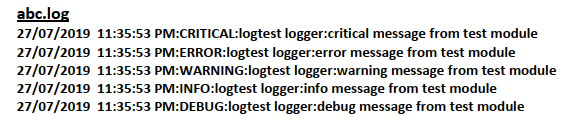

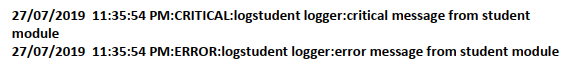

## Demo Program 2

**custlogger.py**

```
import logging
import inspect
def get_custom_logger(level):
  function_name =inspect.stack()[1][3]
  logger_name=function_name+" logger"
  
  logger=logging.getLogger(logger_name)
  logger.setLevel(level)

  fileHandler = logging.FileHandler('abc.log',mode='a')
  fileHandler.setLevel(level)
  
  formatter=logging.Formatter(
  '%(asctime)s:%(levelname)s:%(name)s:%(message)s',
  datefmt='%d/%m/%Y %I:%M:%S %p'
  )
  
  fileHandler.setFormatter(formatter)
  logger.addHandler(fileHandler)
  return logger
```

**test.py**

```
from custlogger import get_custom_logger
import logging

def f1():
  logger=get_custom_logger(logging.DEBUG)
  logger.critical('critical message from  from f1')
  logger.error('error message from  from f1')
  logger.warning('warning message from  from f1')
  logger.info('info message from  from f1')
  logger.debug('debug message from  from f1')
  
def f2():
  logger=get_custom_logger(logging.WARNING)
  logger.critical('critical message from  from f2')
  logger.error('error message from  from f2')
  logger.warning('warning message from  from f2')
  logger.info('info message from  from f2')
  logger.debug('debug message from  from f2')
  
  def f3():
  logger=get_custom_logger(logging.ERROR)
  logger.critical('critical message from  from f3')
  logger.error('error message from  from f3')
  logger.warning('warning message from  from f3')
  logger.info('info message from  from f3')
  logger.debug('debug message from  from f3')
  
f1()
f2()
f3()
```

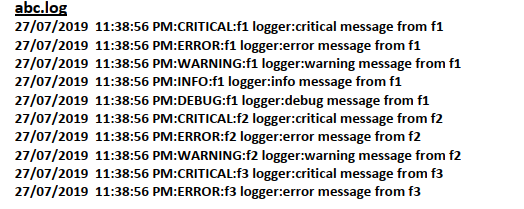

# Logger Configuration File-Dict-JSON-YAML

Instead of hard-coding logging configurations inside our application, we can separate them into a **file** or **dictionary** or **JSON** or **YAML**.

**Advantages:**
* Modifications will become very easy.
* We can reuse the same configurations in different modules.
* The length of the code will be reduced and readability will be improved.

## Logger configurations into a separate config file

**`logging_config.init`** → For File Handler 

```
[loggers]
 keys=root,demologger

[handlers]
keys=fileHandler

[formatters]
keys=sampleFormatter

[logger_root]
level=DEBUG
handlers=fileHandler

[logger_demologger]
level=DEBUG
handlers=fileHandler
qualname=demoLogger

[handler_fileHandler]
class=FileHandler
level=DEBUG
formatter=sampleFormatter
args=('test.log','w')

[formatter_sampleFormatter]
format=%(asctime)s:%(name)s:%(levelname)s:%(message)s
datefmt=%d/%m/%Y %I:%M:%S %p
```

**`logging_config.init`** → For Console Handler

```
[loggers]
keys=root,demologger

[handlers]
keys=consoleHandler

[formatters]
keys=sampleFormatter

[logger_root]
level=DEBUG
handlers=consoleHandler

[logger_demologger]
level=DEBUG
handlers=consoleHandler
qualname=demoLogger

[handler_consoleHandler]
class=StreamHandler
level=DEBUG
formatter=sampleFormatter
args=(sys.stdout,)

[formatter_sampleFormatter]
format=%(asctime)s:%(name)s:%(levelname)s:%(message)s
datefmt=%d/%m/%Y %I:%M:%S %p
```

**test.py**

```
import logging
import logging.config

logging.config.fileConfig("logging_config.init")
logger=logging.getLogger('demologger')
logger.critical('It is critical message')
logger.error('It is error message')
logger.warning('It is warning message')
logger.info('It is info message')
logger.debug('It is debug message')
```

## Logger configurations into a dictionary

**test.py**

```
import logging
from logging.config import dictConfig

logging_config = dict(
  version = 1,
  formatters = {
    'f': {
      'format':
      '%(asctime)s:%(name)s:%(levelname)s:%(message)s',
      'datefmt':'%d/%m/%Y %I:%M:%S %p'
    }
  },  
  handlers = {
    'h': {
      'class': 'logging.StreamHandler',
      'formatter': 'f',
      'level': logging.DEBUG
    }
  },
  root = {
    'handlers': ['h'],
    'level': logging.DEBUG,
  },
)

dictConfig(logging_config)

logger = logging.getLogger()
logger.critical('it is critical message')
logger.error('it is error message')
logger.warning('it is warning message')
logger.info('it is info message')
logger.debug('it is debug message')
```